<a href="https://colab.research.google.com/github/Sawant-Chaitanya/Company-Bankruptcy-Prediction-/blob/main/COMPANY_BANKRUPTCY_PREDICTION_Chaitanya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Prediction of bankruptcy is a phenomenon of increasing interest to firms who
stand to loose money because on unpaid debts. Since computers can store huge dataset
pertaining to bankruptcy making accurate predictions from them before hand is becoming
important. 

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

 In this project you will use various classification algorithms on bankruptcy
dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **Attribute Information**

Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

Y - Bankrupt?: Class label 1 : Yes , 0: No 

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings("ignore")


In [2]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Loading and Cleaning**

In [4]:
# using pandas library and 'read_csv' function to read YesBank_StockPrices csv file
df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Bankruptcy Analysis/COMPANY BANKRUPTCY PREDICTION.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [5]:
df.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,0.175045,0.175045,0.175045,0.216602,0.320966,0.020766,0.098200,0.172102,0.022374,0.848205,0.689778,0.689778,0.217635,7.070000e+09,0.000450,0.264517,0.380155,0.010451,0.005457,0.631415,0.006655,0.124618,0.875382,0.005150,...,0.578455,0.099481,0.005469,0.005072,0.103838,0.346224,0.277543,0.013212,0.786888,0.736716,0.330914,1.792237e-03,0.925611,0.002266,0.019060,0.000229,0.000124,0.593985,1.077940e-04,0.671570,0.400338,0.786888,0.330914,0.112622,0.639806,0.458639,0.587178,0.314063,0.027951,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,0.181324,0.181324,0.181324,0.216697,0.318278,0.023050,0.098608,0.172780,0.022159,0.848245,0.689734,0.689734,0.217631,5.220000e+09,0.000445,0.264730,0.377389,0.009259,0.006741,0.631489,0.004623,0.099253,0.900747,0.006772,...,0.444043,0.080337,0.006790,0.004727,0.089901,0.342166,0.277368,0.006730,0.849898,0.734584,0.329753,2.204673e-03,0.932629,0.002288,0.011118,0.000152,0.000117,0.593954,7.710000e+09,0.671572,0.096136,0.849898,0.329753,0.112329,0.642072,0.459058,0.569498,0.314446,0.031470,0,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,0.269521,0.269521,0.269521,0.210929,0.324857,0.044255,0.100073,0.173232,0.022068,0.847978,0.689202,0.689202,0.217547,5.990000e+09,0.000435,0.263858,0.379392,0.038424,0.035112,0.63061

# **Data Exploration**

In [6]:
#information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
#number of rows and columns 
df.shape

(6819, 96)

In [8]:
df.columns = [i.title().strip() for i in list(df.columns)]

row = df.shape[0]
col = df.shape[1]
print("The number of rows within the dataset are {} and the number of columns is {}".format(row,col))

The number of rows within the dataset are 6819 and the number of columns is 96


In [9]:
df.isnull().sum().sort_values(ascending=False).head()

Equity To Liability                 0
Net Income Flag                     0
Operating Profit Growth Rate        0
After-Tax Net Profit Growth Rate    0
Regular Net Profit Growth Rate      0
dtype: int64

A further consideration needs to be done on the possibility to have duplicates in our data. Duplicates are identical observations that can create redundancy in our data and need to be dropped. Let's check the presence of duplicates to remove:

In [10]:
# Checking for duplicates

df.duplicated().sum()

0

Now that we have an idea of our data, we need to obtain more information possible on them. The first thing that we want to understand is the nature of our data, namely if the data are numerical or categorical and if we have missing information among them. It is possible to check both these points using the .info() pandas method.

The resulting panel is strongly informative for us, and it shows how:

- The dataset is composed of a combination of 6819 observations per each of our 96 features.

- There are no missing values (Nan) among the data

In [11]:
# Computing the descriptive statistics of our numrerical features

df.describe()

,Bankrupt?,Roa(C) Before Interest And Depreciation Before Interest,Roa(A) Before Interest And % After Tax,Roa(B) Before Interest And Depreciation After Tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-Tax Net Interest Rate,After-Tax Net Interest Rate,Non-Industry Income And Expenditure/Revenue,Continuous Interest Rate (After Tax),Operating Expense Rate,Research And Development Expense Rate,Cash Flow Rate,Interest-Bearing Debt Interest Rate,Tax Rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent Eps In The Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net Profit Before Tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-Tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total Debt/Total Net Worth,Debt Ratio %,Net Worth/Assets,Long-Term Fund Suitability Ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability To Assets,Operating Funds To Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-Term Liability To Current Assets,Retained Earnings To Total Assets,Total Income/Total Expense,Total Expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working Capitcal Turnover Rate,Cash Turnover Rate,Cash Flow To Sales,Fixed Assets To Assets,Current Liability To Liability,Current Liability To Equity,Equity To Long-Term Liability,Cash Flow To Total Assets,Cash Flow To Liability,Cfo To Assets,Cash Flow To Equity,Current Liability To Current Assets,Liability-Assets Flag,Net Income To Total Assets,Total Assets To Gnp Price,No-Credit Interval,Gross Profit To Sales,Net Income To Stockholder'S Equity,Liability To Equity,Degree Of Financial Leverage (Dfl),Interest Coverage Ratio (Interest Expense To Ebit),Net Income Flag,Equity To Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

In [12]:
print(df['Bankrupt?'].value_counts())
print('-'* 30)
print('Financially stable: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Financially unstable: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

0    6599
1     220
Name: Bankrupt?, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


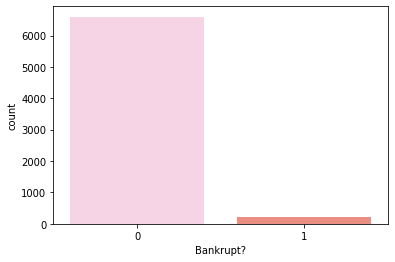

In [13]:
value = randint(0, len(colors)-1)

sns.countplot('Bankrupt?',data=df,palette = colors[value])

Looking at the plot above we can clearly see how our labels are strongly unbalanced, and this is a the main obstacle that we need to solve to obtain good performances.

This heavily imbalanced data will heavily influnence our models. We have deal with doing some resampling in furthur stages(either oversampling or by undersampling)

**Exploratory Data Analysis (EDA).** 



Let's explore our dataset to gain as much information as possible from several types of visualizations. A first general plot to show is the correlation heatmap that plots all the correlations (linear and non, depending on the the selected test: Pearson or Spearman) among numerical variables of the dataset. Knowing the correlations among features is an important step in deciding which features to maintain during training.

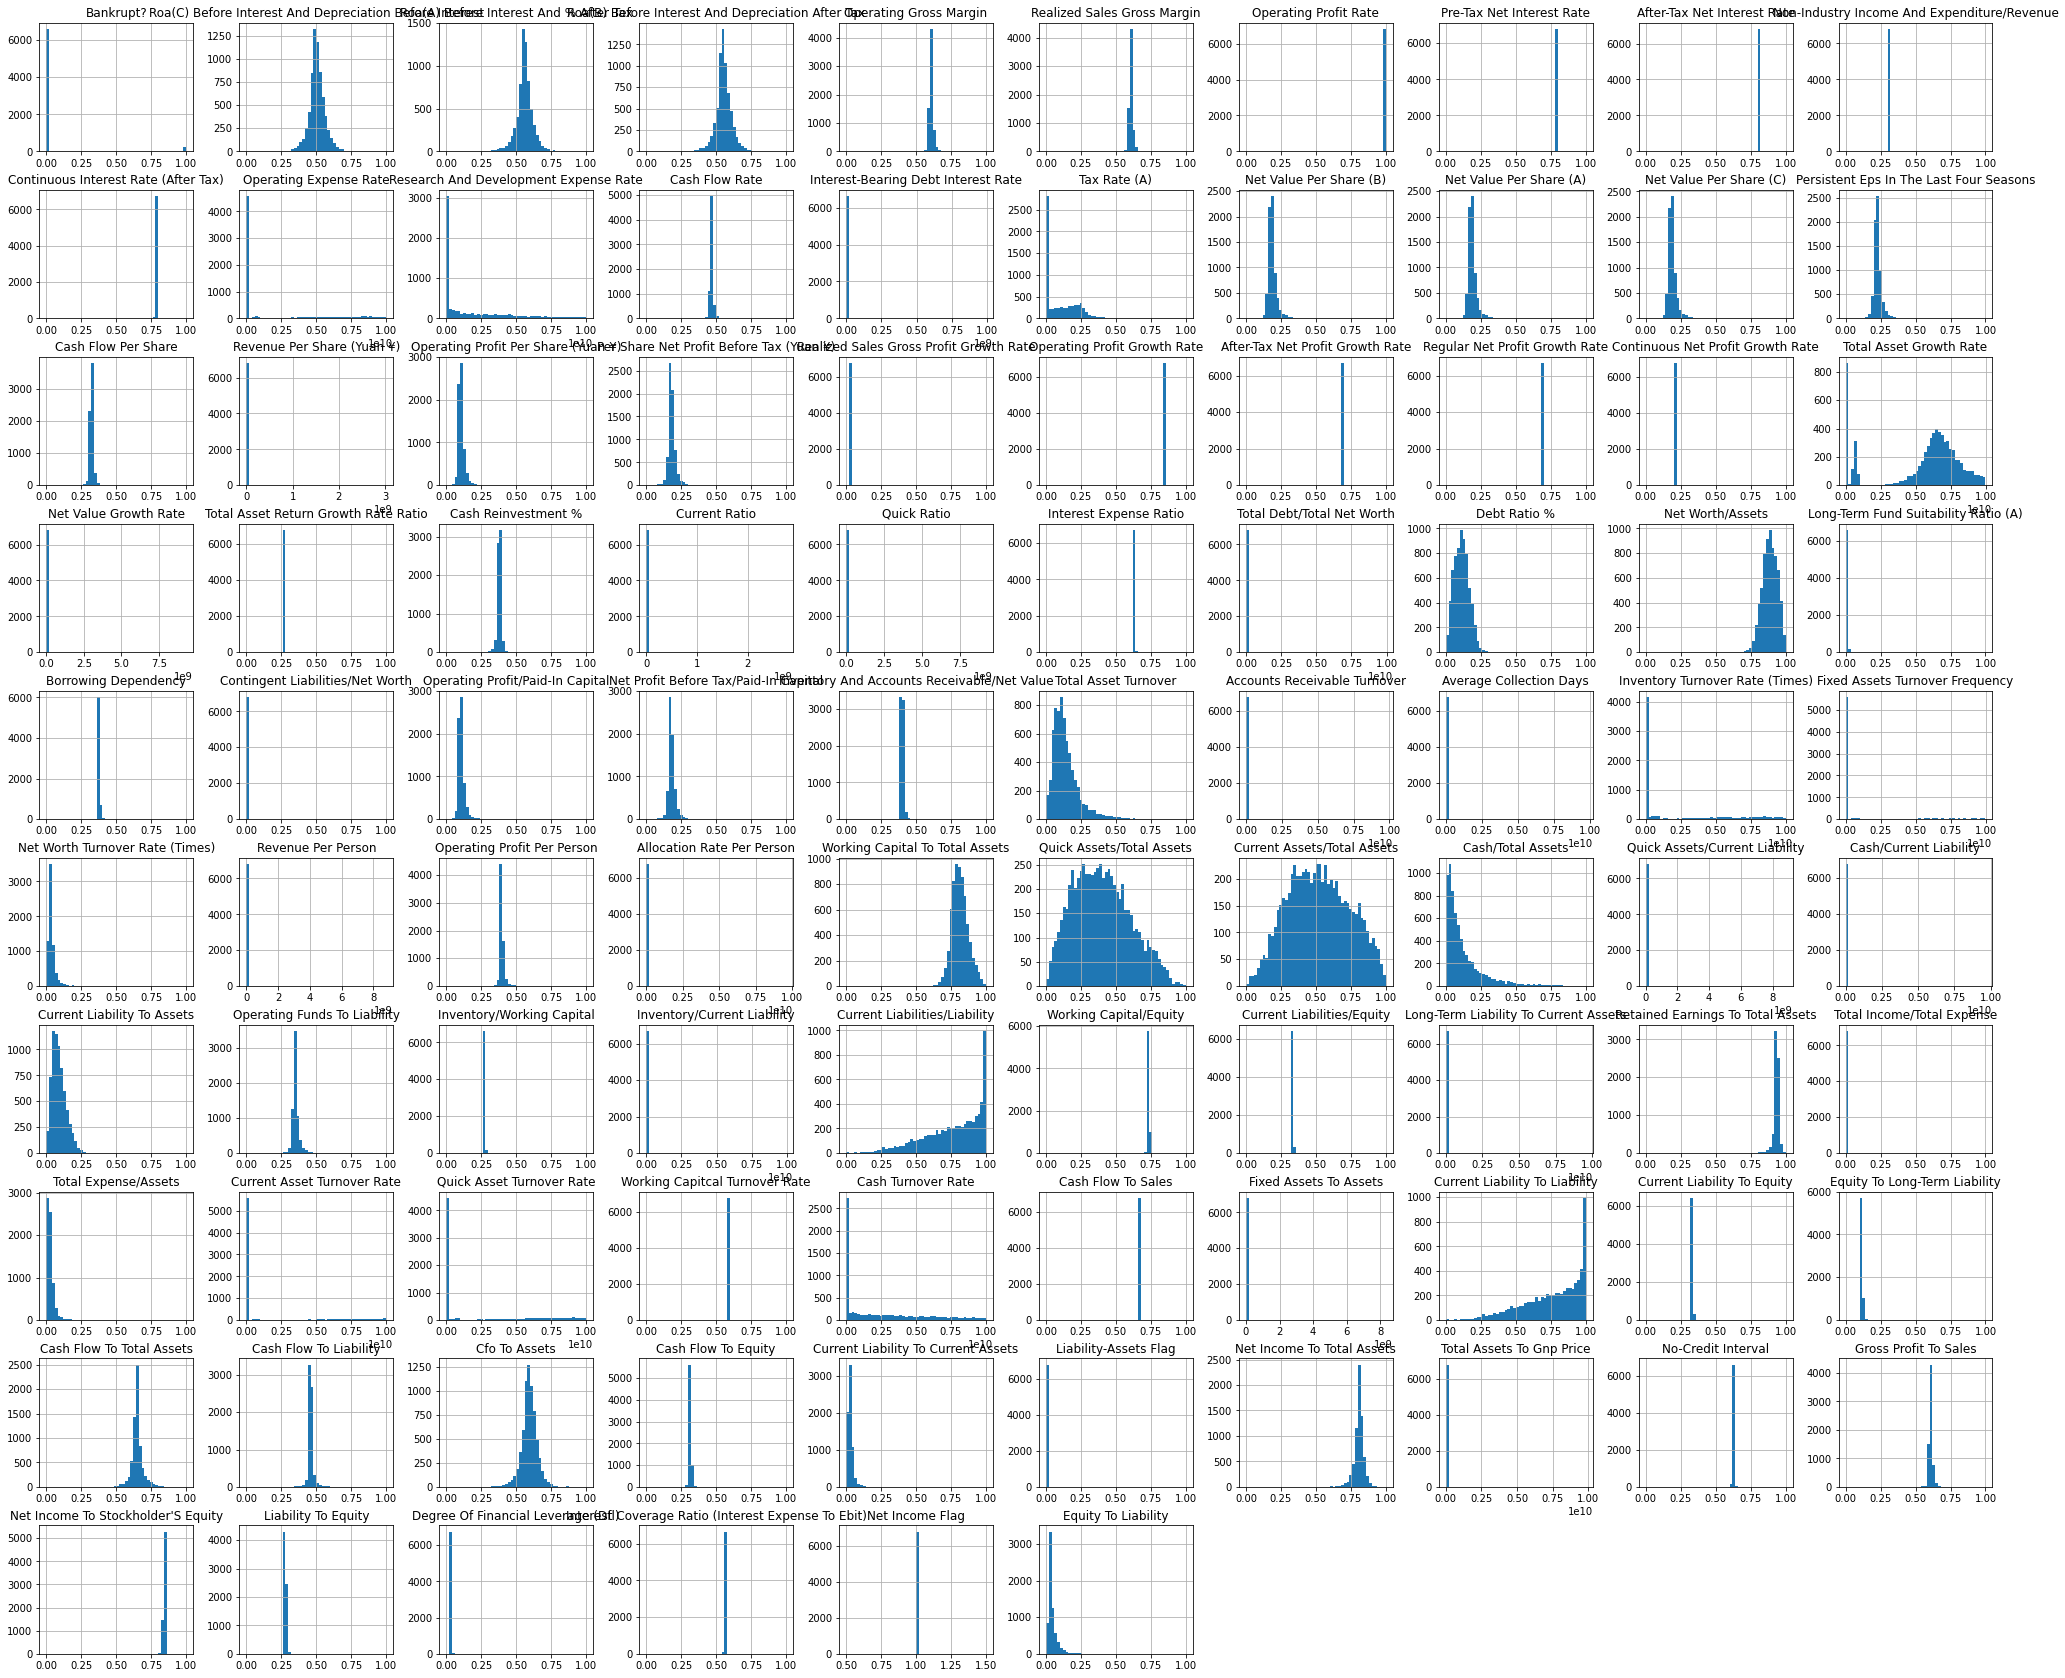

In [14]:
# Looking at the histograms of numerical data

df.hist(figsize = (35,30), bins = 50)
plt.show()

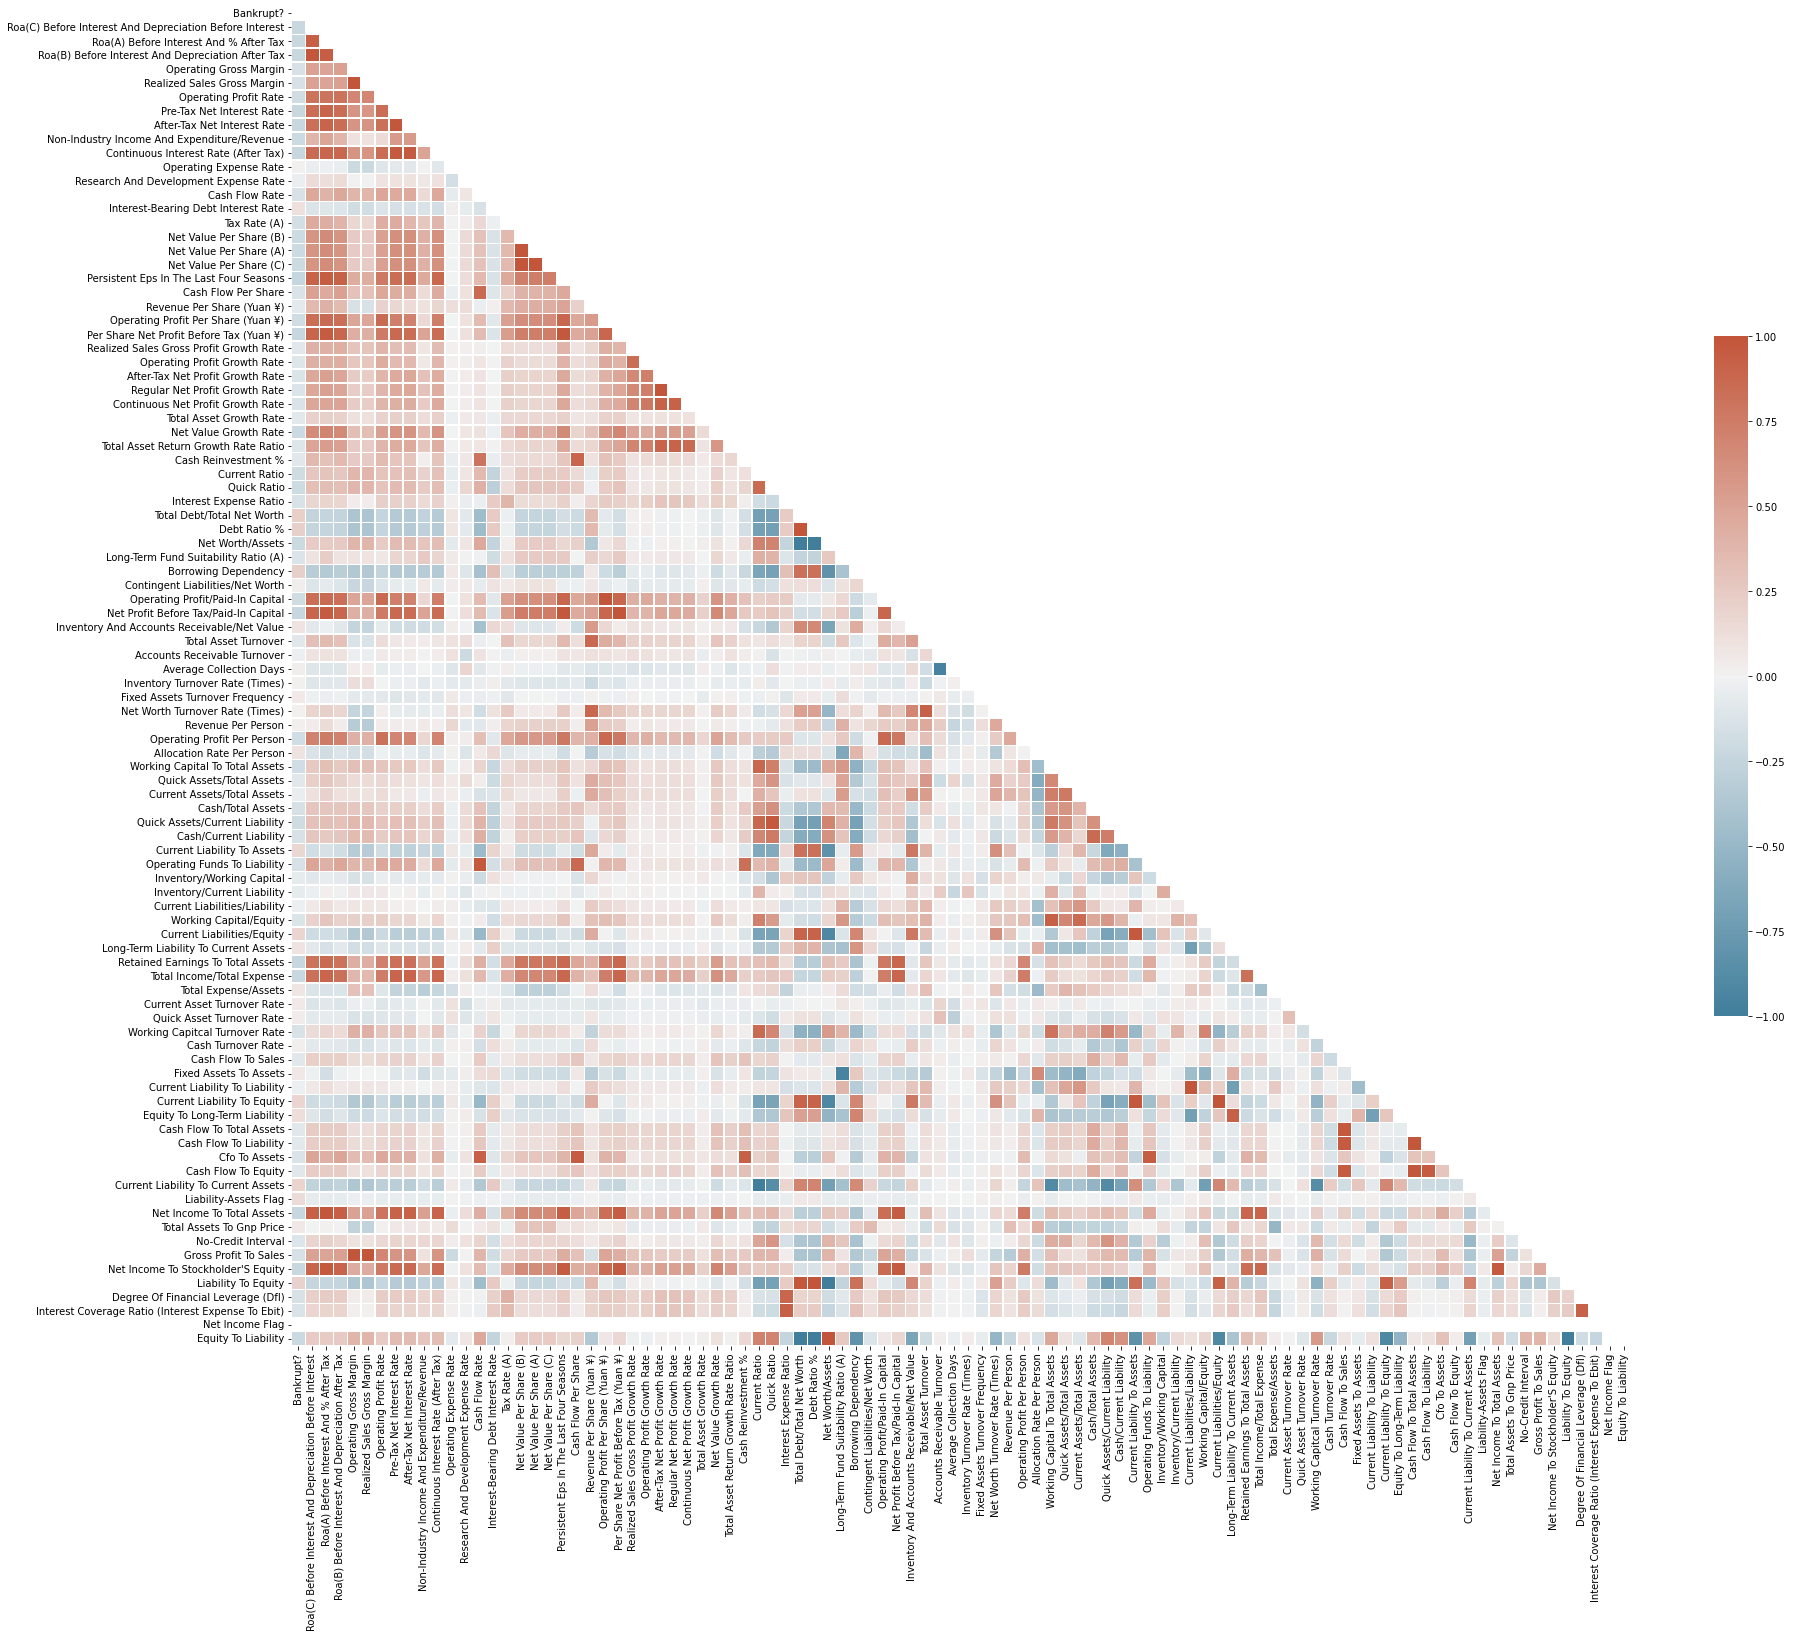

In [15]:
# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

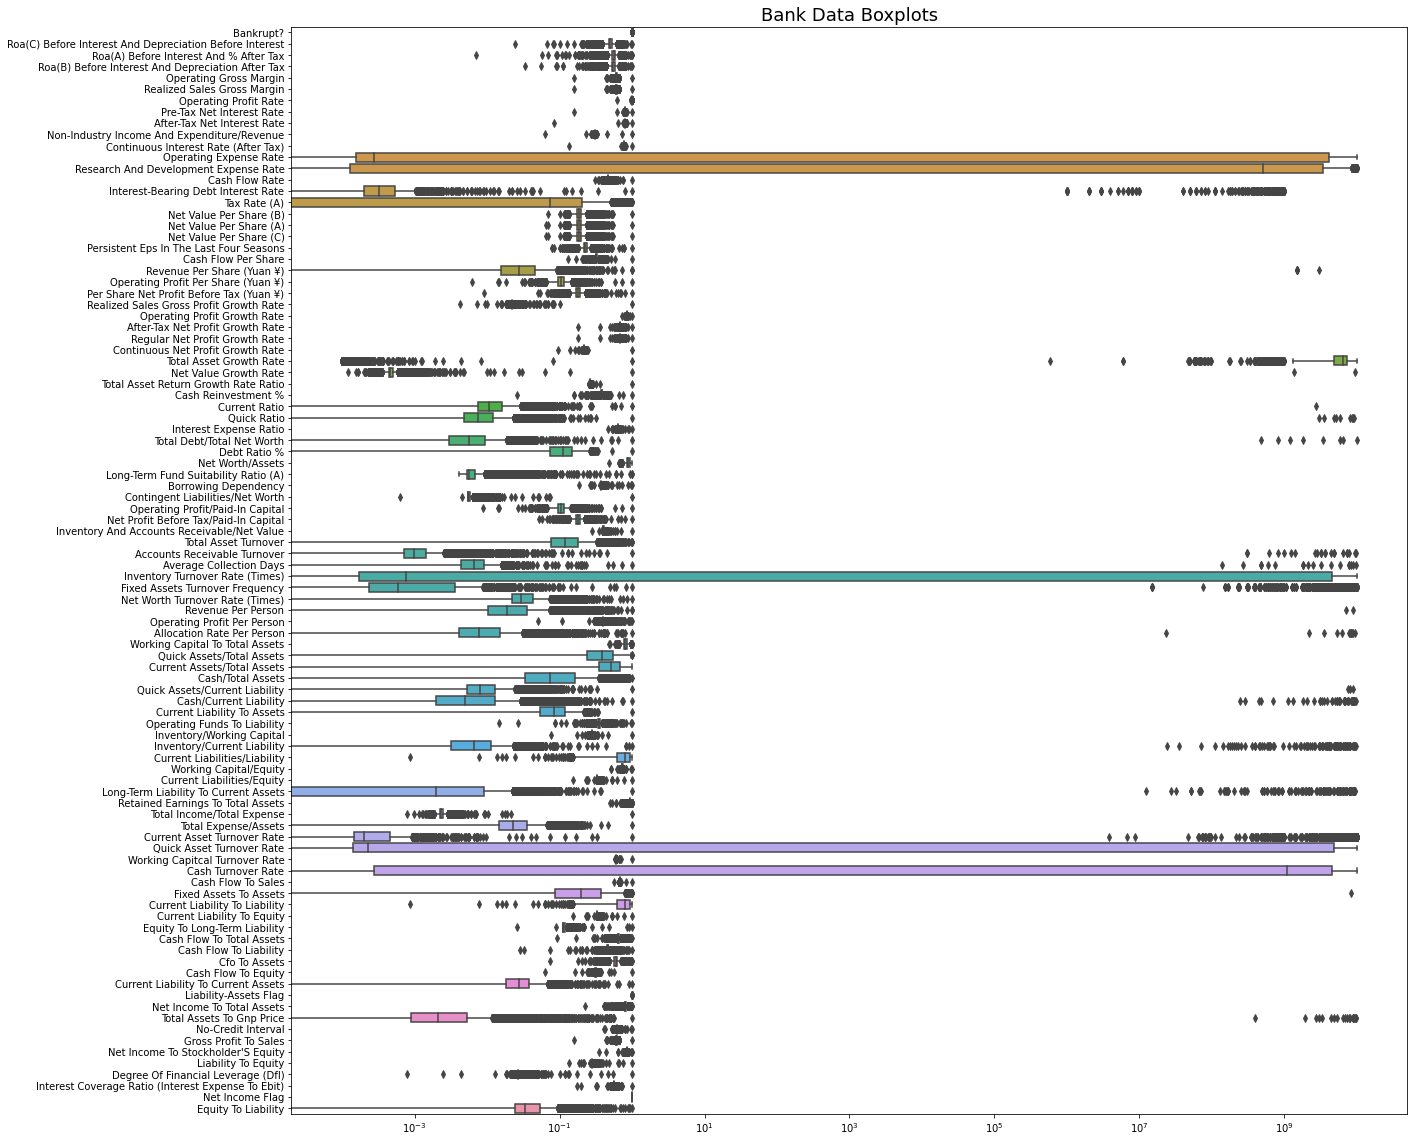

In [16]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

**Outliers removal**

In this part of the project will try to remove the most extreme outliers (note that you can also impute them with the mean or the median instead of removing them). This should increase our models' performance.

In [17]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.47652708038804703 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733193
Cut Off: 0.08855360015599789
Roa(C) Before Interest And Depreciation Before Interest Lower: 0.38797348023204914
Roa(C) Before Interest And Depreciation Before Interest Upper: 0.6241164139813768
Roa(C) Before Interest And Depreciation Before Interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
Roa(A) Before Interest And % After Tax Lower: 0.45512156563454
Roa(A) Before Interest And % After Tax Upper: 0.66957860880942
Roa(A) Before Interest And % After Tax outliers for close to bankruptcy cases: 561
----------

In [18]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']

There are only three categorical data columns, we will first explore these columns

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64


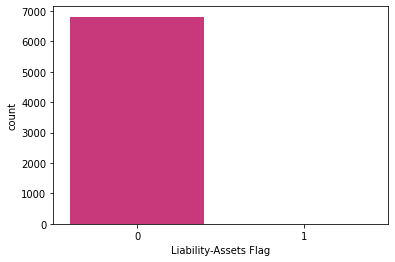

In [19]:
value = randint(0, len(colors)-1)

print(df['Liability-Assets Flag'].value_counts())
sns.countplot('Liability-Assets Flag',data=df,palette = colors[value])


The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities.

Liability-Assets Flag  Bankrupt?
0                      0            6597
                       1             214
1                      1               6
                       0               2
dtype: int64


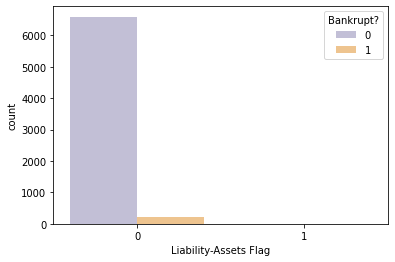

In [20]:
value = randint(0, len(colors)-1)

print(df[['Liability-Assets Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Liability-Assets Flag',hue = 'Bankrupt?',data = df,palette = colors[value])

A small portion of organizations suffers bankruptcy, although possessing more assets than their liabilities.

1    6819
Name: Net Income Flag, dtype: int64


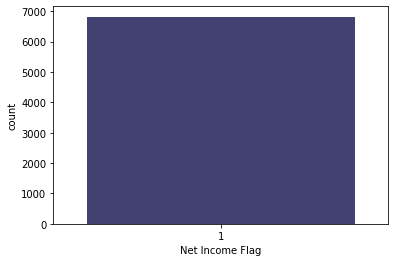

In [21]:
value = randint(0, len(colors)-1)

print(df['Net Income Flag'].value_counts())
sns.countplot('Net Income Flag',data=df,palette = colors[value])

The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years.

Net Income Flag  Bankrupt?
1                0            6599
                 1             220
dtype: int64


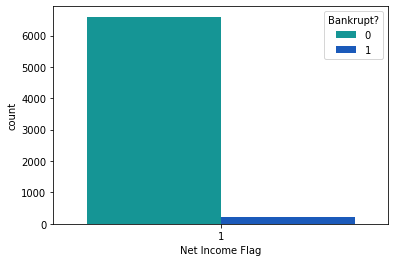

In [22]:
value = randint(0, len(colors)-1)

print(df[['Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt?',data = df,palette = colors[value])

Many organizations that have suffered losses for the past two years have stabilized their business, thus avoiding bankruptcy.

In [23]:
# dividing data labels
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

def log_trans(data):
    
    for col in data:
        skew = data[col].skew()
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
            
    return data

X = log_trans(X)

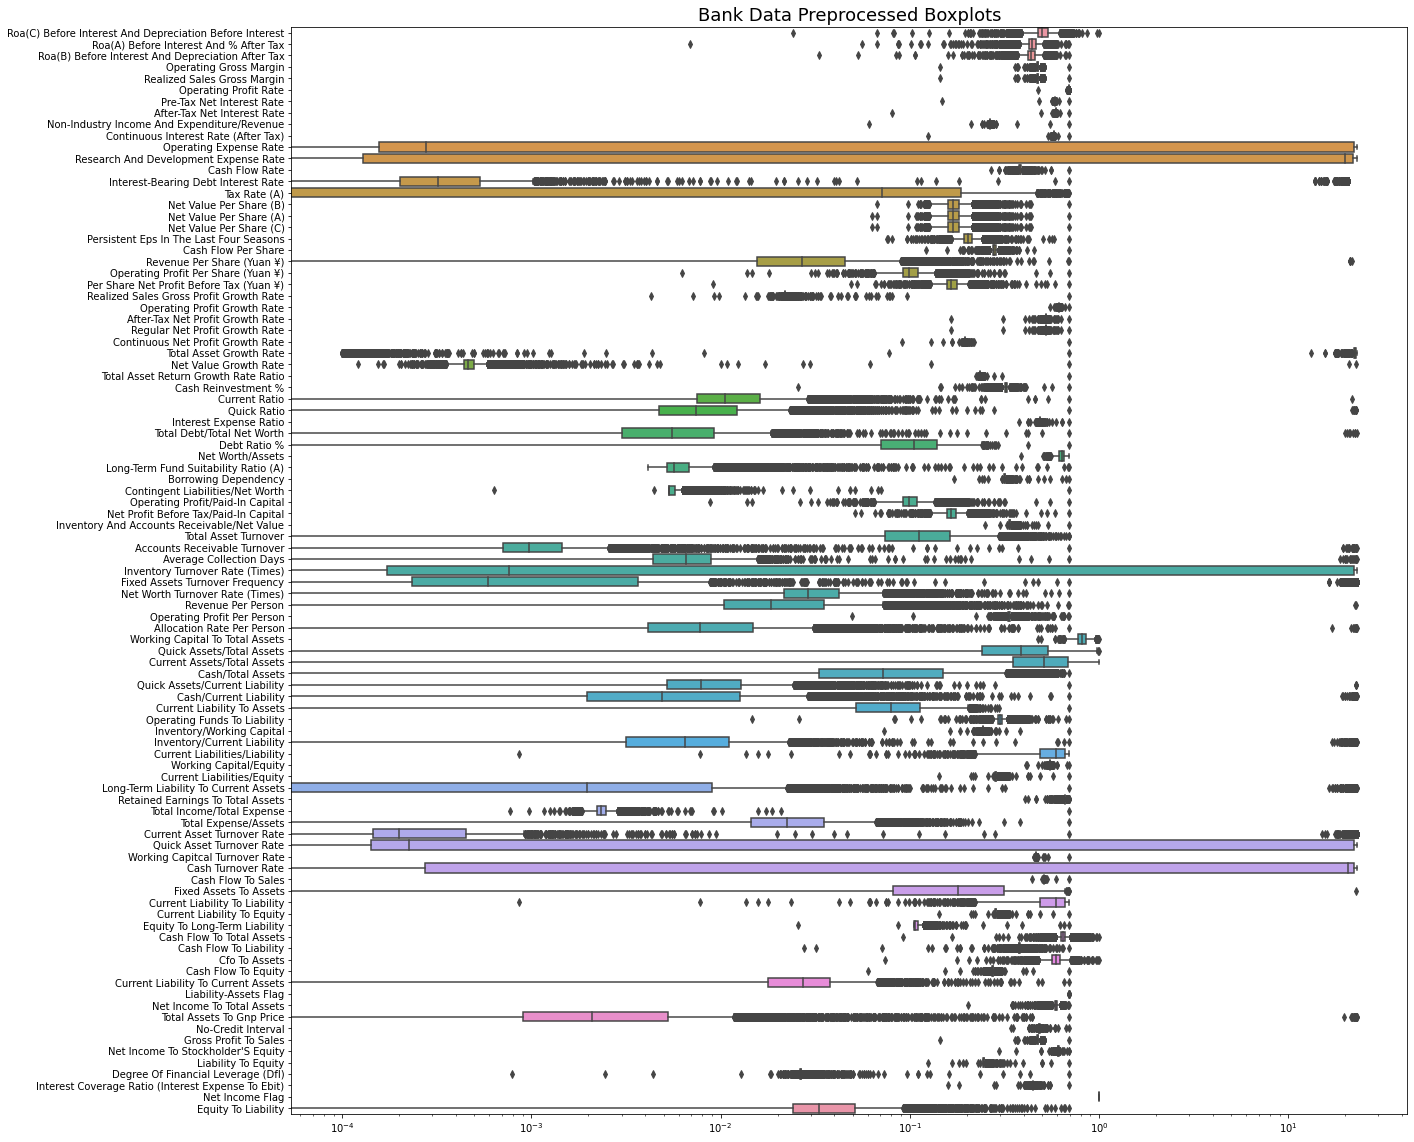

In [24]:
# Plotting Boxplots of the preprocessed numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = X, orient="h")
ax.set_title('Bank Data Preprocessed Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

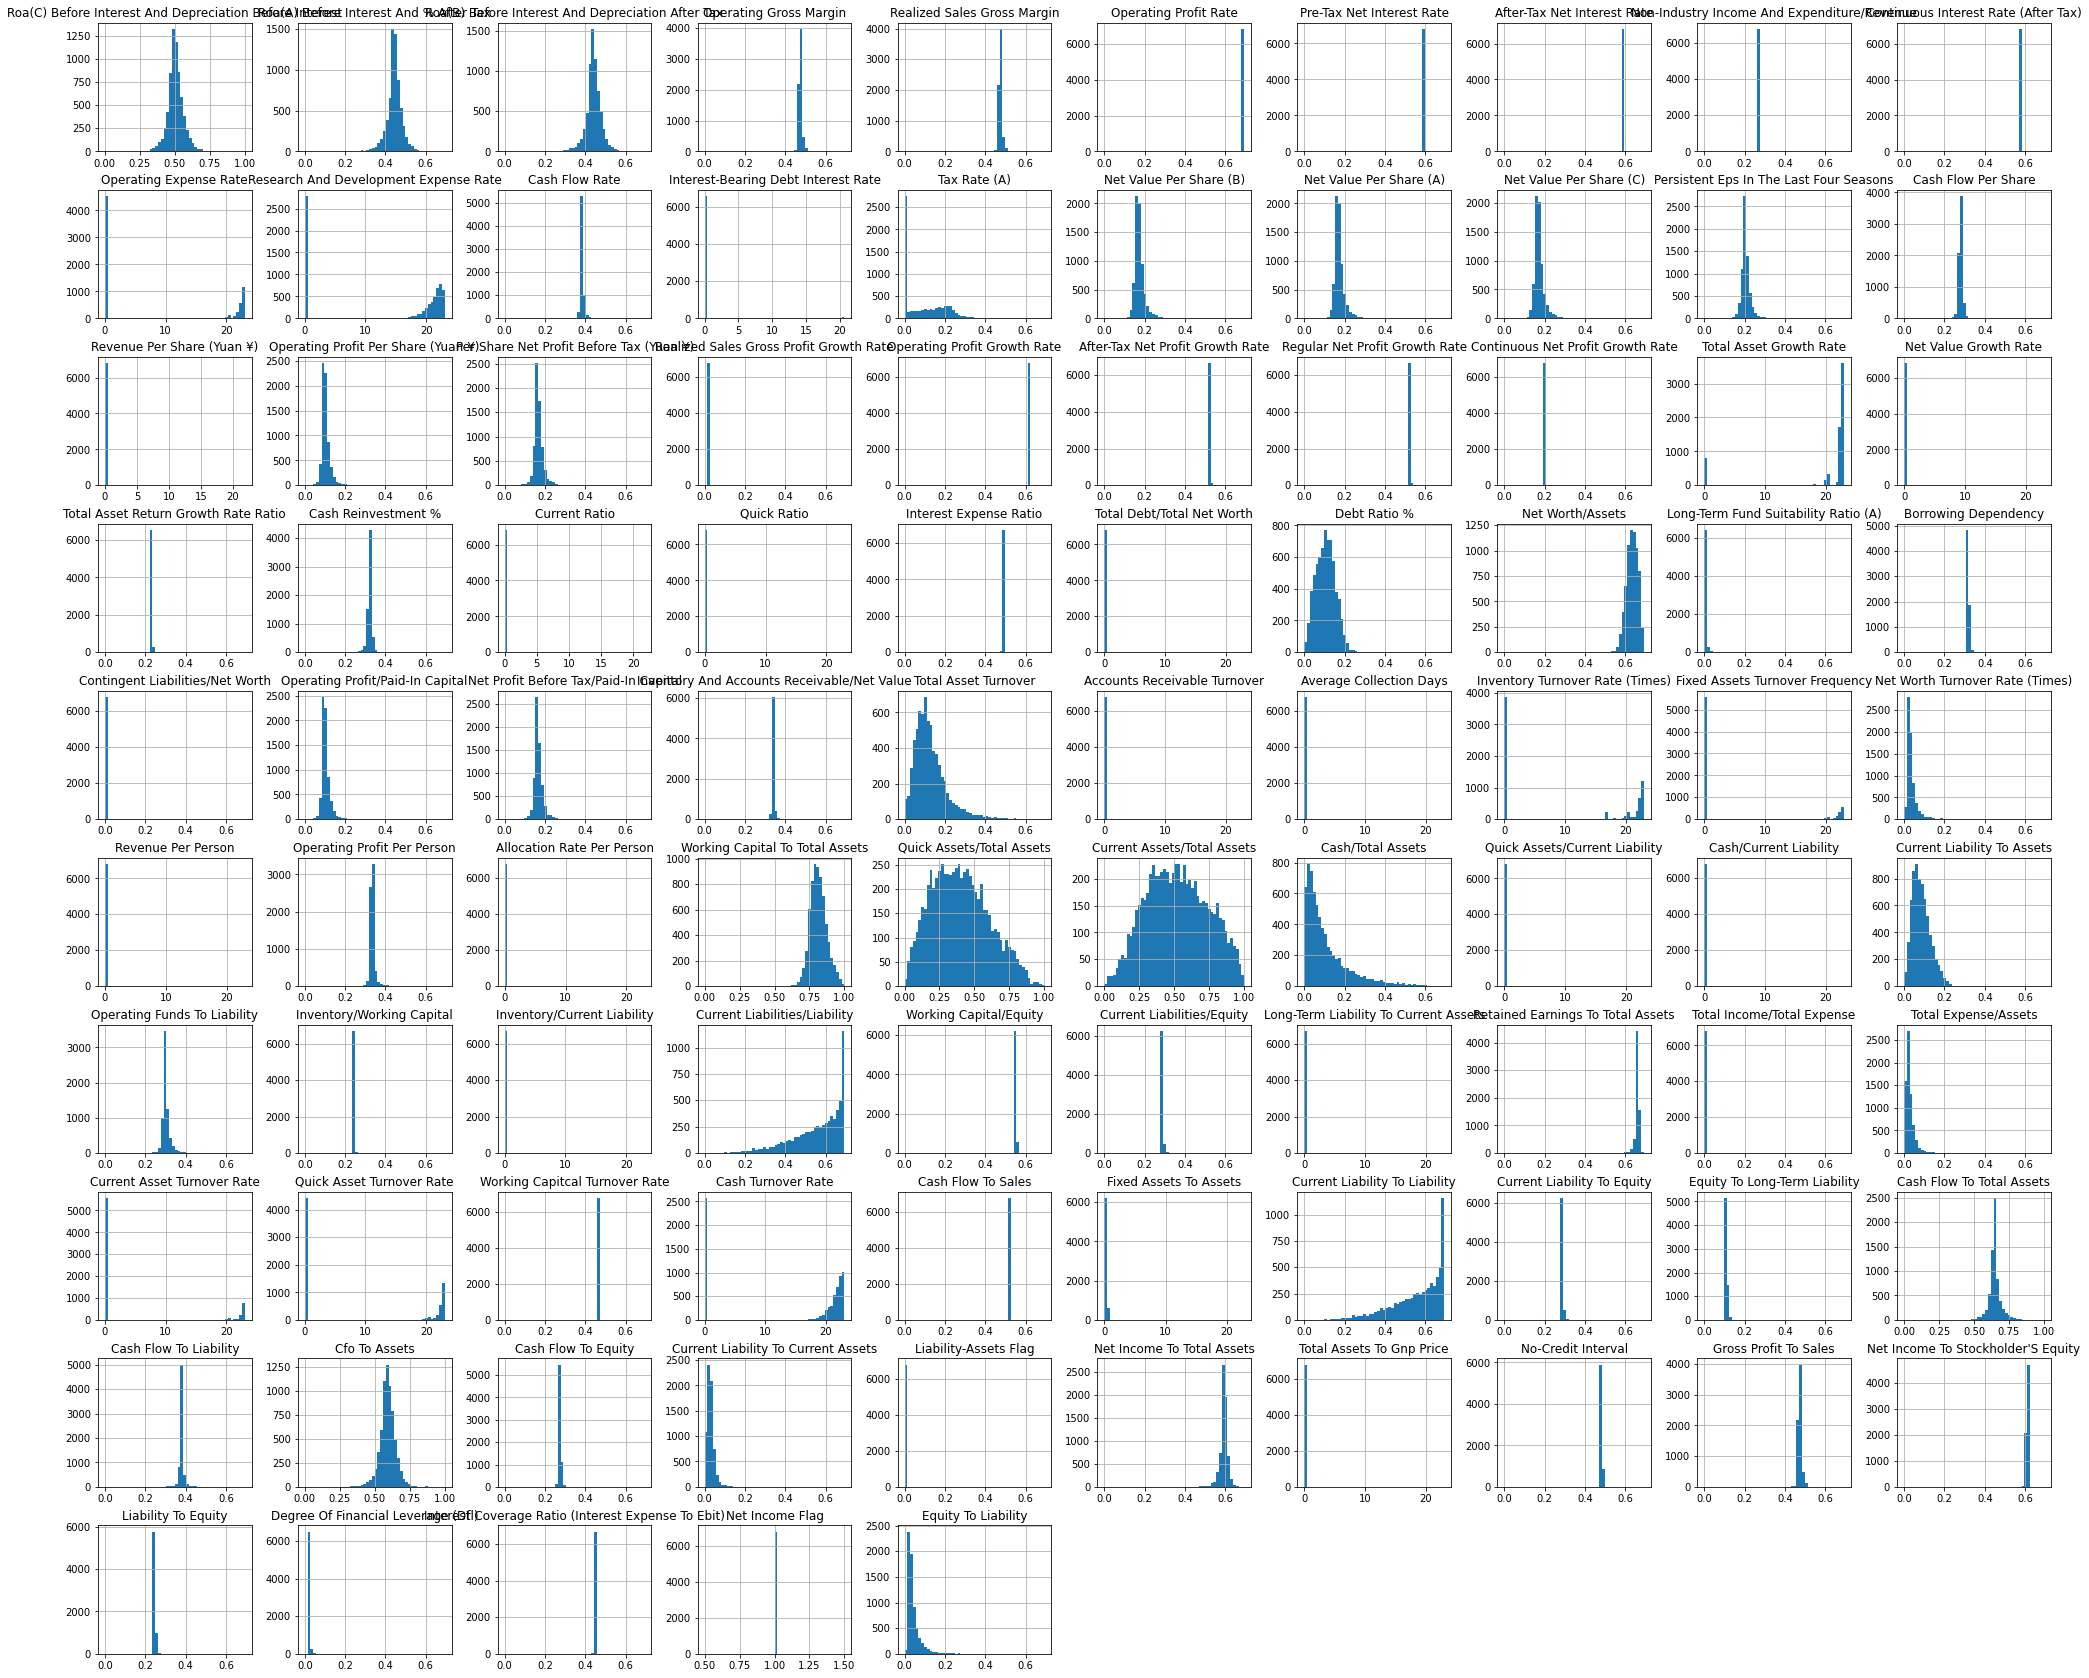

In [25]:
X.hist(figsize = (35,30),bins = 50)
plt.show()

**For the sake of simplicity, we analyze the six top positively and negatively correlated attributes.**

In [26]:
positive_corr = df[numeric_features].corrwith(df["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df[numeric_features].corrwith(df["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = df[positive_corr + ["Bankrupt?"]].copy()
negative_corr = df[negative_corr + ["Bankrupt?"]].copy()

In [27]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
    value = randint(0, len(colors)-1)

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = df,palette = colors[value])

    plt.tight_layout(pad=0.5)

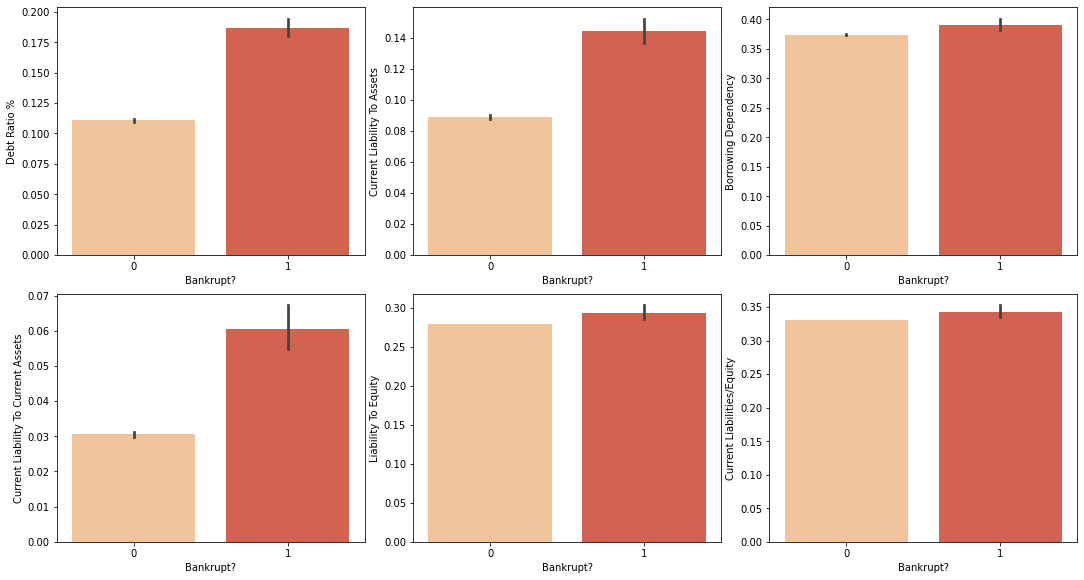

In [28]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

We see that three attributes - "Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" are commonly high in bankrupt organizations.

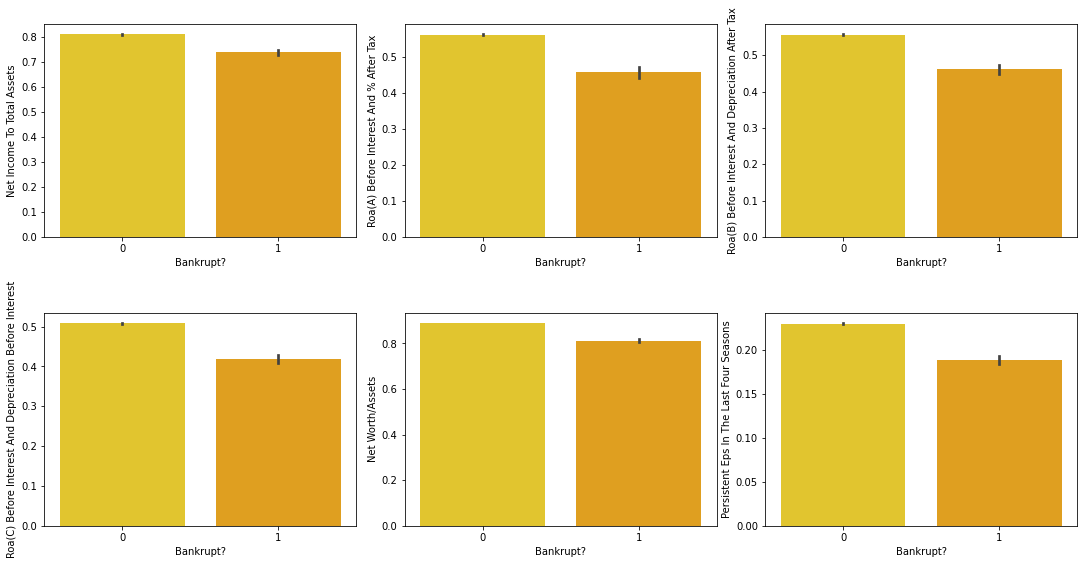

In [29]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

These attributes show us that the more the assets and earing of a company, the less likely is the organization to be bankrupt.
Let us check the relation of top six positive and negative correlation attributes among eachother

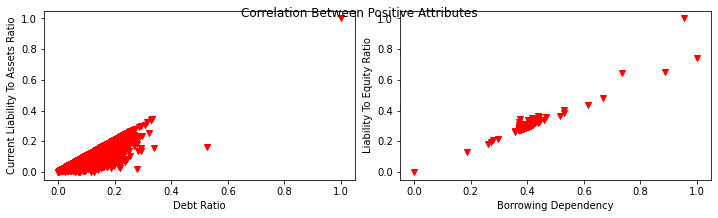

In [30]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")


plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
plt.scatter(df["Debt Ratio %"],df["Current Liability To Assets"], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
plt.scatter(df["Borrowing Dependency"],df["Liability To Equity"], marker='v',color = 'red')

plt.tight_layout(pad=0.8)

There is a positive relation between attributes that have a high correlation with the target attribute.

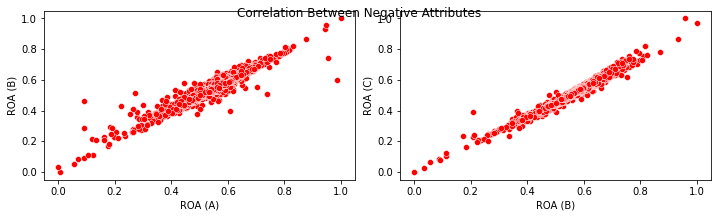

In [31]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(data=df, x='Roa(A) Before Interest And % After Tax', y='Roa(B) Before Interest And Depreciation After Tax',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=df, x='Roa(B) Before Interest And Depreciation After Tax', y='Roa(C) Before Interest And Depreciation Before Interest',color = 'red')

plt.tight_layout(pad=0.8)

There is a positive relation between attributes that have a low correlation with the target attribute.

 **CORRELATION**

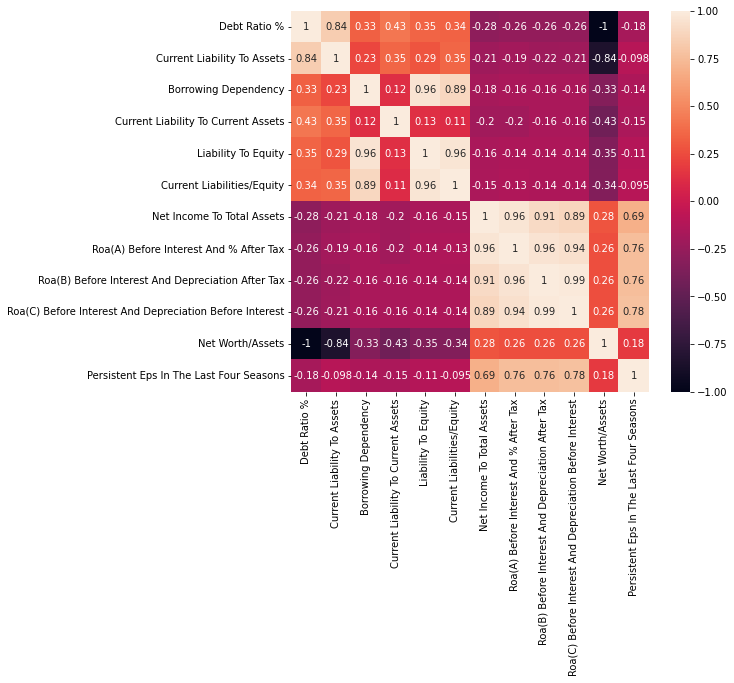

In [32]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(df[relation].corr(),annot=True)
plt.show()

A total correlation of the top 12 attributes are given above

## **Summary of Analysis**

The number of organizations that have gone bankrupt in 10 years between 1999 – 2000 is few.

Several companies possess many assets, which is always a good sign for an organization.

An organization cannot guarantee not being bankrupt, although owning several assets.

The organizations in the dataset are running into losses for the past two years as their net income poses to be negative.

Very few of the organizations that have had negative income in the past two years suffer from bankruptcy.

It is observed that “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" attributes are a few of the attributes that have a high correlation with the target attribute.

An increase in the values of the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” causes an organization to suffer heavy losses, thus resulting in bankruptcy.

An increase in the values of the attributes that have a negative correlation with the target attribute helps an organization avoid bankruptcy.

There seems to be a relation between attributes that have a high correlation with the target attribute and a low correlation with the target attribute.

We observed several correlations among the top 12 attributes, one of which being “Net Worth/Assets and Debt Ratio %” that is negatively correlated with one another.

# **Data Modeling**

**standerdisation**

In [33]:
# # numeric_features = df.dtypes[df.dtypes != 'int64'].index
# df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

# df[numeric_features] = df[numeric_features].fillna(0)

In [34]:
# df.hist(figsize = (35,30),bins = 50)
# plt.show()


**EDIT**

The numeric attributes have been normalized.

Our dataset is highly imbalanced. Thus before training the model, we need to deal with this data. Let us lay down some steps we must follow when we come across an imbalanced dataset.

### **SMOTE**

Let's see if using SMOTE as oversampling technique can help us improving the performance. Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.



Split the dataset into training and testing sets (80% - 20%). We preserve the 20% testing set for the final evaluation.
Through "Stratified K Fold Cross-Validation" we will now distribute the 80% training set into further training and testing splits.
Since we are dealing with over 50 features, we use "Randomized Search Cross-Validation" as this technique proves to perform better with many features.

EDIT
**bold text**
## MODELING

Now, let's see what we can do with our models! We will see the performances on the cleaned undersampled data and on the SMOTE oversampled data. For this part I decided to use a few different models:

* K nearest Neighbour
* Logistic Regression
* Decision Tree Classifier 
* Random Forest Classifier
* Support Vector Classifier



In [35]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Modelname):
    
    # df = Dataframe.copy()
    
    # X = df.drop('Bankrupt?', axis=1)
    # y = df['Bankrupt?']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

### **K Nearest Neighbour**

In [36]:
print("K Nearest Neighbour")
TrainedModel = taining_without_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(),"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

K Nearest Neighbour

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1313
           1       0.61      0.80      0.69        51

    accuracy                           0.97      1364
   macro avg       0.80      0.89      0.84      1364
weighted avg       0.98      0.97      0.98      1364



### **Logistic Regression**

In [37]:
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)

Logistic Regression

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.24      0.86      0.37        51

    accuracy                           0.89      1364
   macro avg       0.62      0.88      0.66      1364
weighted avg       0.97      0.89      0.92      1364



### **DecisionTree Classifier**

In [38]:
print("DecisionTree Classifier")
TrainedModel = taining_without_feature_selection({"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}, DecisionTreeClassifier(), "DecisionTree Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

DecisionTree Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1313
           1       0.20      0.86      0.32        51

    accuracy                           0.87      1364
   macro avg       0.60      0.86      0.62      1364
weighted avg       0.96      0.87      0.90      1364



### **Random Forest Classifier**

In [39]:
print("Random Forest Classifier")
TrainedModel = taining_without_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.75      0.94      0.83        51

    accuracy                           0.99      1364
   macro avg       0.87      0.96      0.91      1364
weighted avg       0.99      0.99      0.99      1364



### **Support Vector Classifier**

In [40]:
print("Support Vector Classifier")
TrainedModel = taining_without_feature_selection({'C': [1,10,20],'kernel': ['rbf','linear']}, SVC(), "Support Vector Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Support Vector Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.24      0.88      0.38        51

    accuracy                           0.89      1364
   macro avg       0.62      0.89      0.66      1364
weighted avg       0.97      0.89      0.92      1364



**add The Confusion Matrix, sensitivity and speficity**

In [ ]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### **Evaluation**

In [41]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
3,Random Forest Classifier,98.61%,0.75,0.94,0.83,0.96
0,K Nearest Neighbour,97.36%,0.61,0.80,0.69,0.89
4,Support Vector Classifier,89.15%,0.24,0.88,0.38,0.89
1,Logistic Regression,89.15%,0.24,0.86,0.37,0.88
2,DecisionTree Classifier,86.51%,0.20,0.86,0.32,0.86


We see that among all the models "Random Forest Classifier and K Nearest Neighbour" have the highest F-1 Score. Thus, we may use these models to train our data.

### **Best Feature Selection**


At the very beginning of this notebook, we spoke about feature selection.


Since my knowledge in finance is limited, why not let machine learning help me? 


**"SelectKBest"** is used to select features that add the most value to the target variable

In [42]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_with_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    df = Dataframe.copy()
    
    X = df.drop('Bankrupt?', axis=1)
    y = df['Bankrupt?']
    
    '''
    Feature Selection Process: 
    class sklearn.feature_selection.SelectKBest(score_func=<function>, k=<number of features>
        score_func - Scoring measure
        k - Total features to be returned 
    '''
    
    fs = SelectKBest(score_func=f_classif, k=int((df.shape[1]*85)/100))

    X = fs.fit_transform(X, y)
    
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)

    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [43]:
print("Random Forest Classifier")
TrainedModel = taining_with_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), df, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.76      0.98      0.85        51

    accuracy                           0.99      1364
   macro avg       0.88      0.98      0.92      1364
weighted avg       0.99      0.99      0.99      1364



In [44]:
print("K Nearest Neighbour")
TrainedModel = taining_with_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), df,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

K Nearest Neighbour

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1313
           1       0.58      0.82      0.68        51

    accuracy                           0.97      1364
   macro avg       0.78      0.90      0.83      1364
weighted avg       0.98      0.97      0.97      1364



In [45]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
0,Random Forest Classifier,98.75%,0.76,0.98,0.85,0.98
1,K Nearest Neighbour,97.07%,0.58,0.82,0.68,0.90


So, as we can see narrowing the data features may not always provide better results it seems! But there is always a possibility that the results may appear few points better than that of the entire dataset features.

**Save Trained Model Using joblib**

In [47]:
# joblib.dump( model name here, 'model_joblib')

In [48]:
# mj = joblib.load('model_joblib')